In [1]:
# Cell #1
# Jupyter Notebook 'Flowers'
# Goal: playing with pixel-based images, understand their
# properties, and at the same time learn how to work with
# matrix objects (numpy arrays) in Python

# By: H.J. Megens
# Where you can reach me: hendrik-jan.megens -at- wur.nl
# Last modified: 22 September 2016

import matplotlib.pyplot as plt # this is the general plotting library from matplotlib
from scipy import misc # module that provides some image manipulation functions
import numpy as np # numpy; note that the convention of importing is to create a sort of 'shortcut' name
import matplotlib.cm as cm # this module provides some color mapping needed for plotting gray or single color

In [2]:
# Cell #2
# First, read in an image. The first image is of a pansy ('viooltje' in Dutch)
# Notice this is done through the scipy.misc library, which contains a method 'imread'
pansy = misc.imread("Flowers/image_pansy_0179.png",mode='RGB')

In [3]:
# Cell #3
# The 'pansy' object is a straightforward numpy array
type(pansy)

numpy.ndarray

In [4]:
# Cell #4
# Let's see what its shape is. You'll see that it is a 3-dimensional array.
pansy.shape

(506, 500, 3)

In [5]:
# Cell #5
# plotting of images can be done through matplotlib.pyplot.
# Note that this function will create an object, not immediately send it to screen!
plt.imshow(pansy)

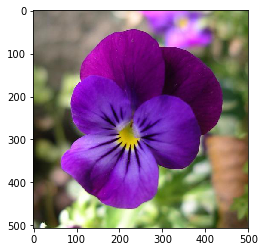

In [6]:
# Cell #6
# once the matplotlib object is created, you will need to use 'plt.show()' 
# to send it to screen. This is the case for any plot you want to display 
# or write to file. Seems strange? Just think about how you might want to 
# alter that plotting object, for instance by adding extra layers, before
# it is finished.
# Note that if you want to continue, you need to close the matplotlib image first.
plt.show()

In [7]:
# Cell #7
# Ok, so that image is a 3-dimensional numpy array
# Every x and y value is a position ('pixel') in the image
# In an RGB image, every position is coded by 3 numbers, one
# each for red, green, and red, in that order. The numbers range
# from 0 to 255.
# Determine the value of a pixel roughly in the centre of the image,
# located at 250,250 in the matrix.
# What do you think the color should be? You can confirm at this website:
# http://www.rapidtables.com/web/color/RGB_Color.htm
pansy[250,250,:] 

array([103,  39, 177], dtype=uint8)

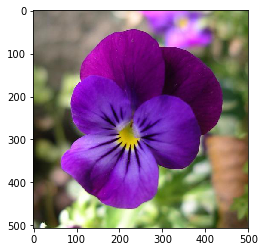

In [8]:
# Cell #8
# We have identified the color (RGB) value of that pixel, but we can also
# change its color. Let's change the color to white.
# Note: if you change a pixel, the image is altered (only the one in memory,
# not the one on disk). Therefore we make a copy of the original first.
pansy_copy = pansy.copy()
pansy_copy[250,250,:] = [255,255,255]
plt.imshow(pansy_copy)
plt.show()

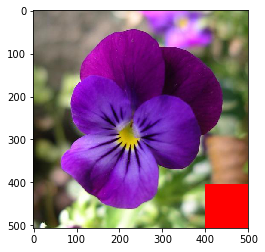

In [9]:
# Cell #9
# We can also change larger (rectangular) fields, by using the feature of
# numpy array that you can easily 'slice' them
# let's make a red square at the bottom right of the image.
pansy_copy = pansy.copy()
pansy_copy[405:505,400:500,:] = [255,0,0]
plt.imshow(pansy_copy)
plt.show()

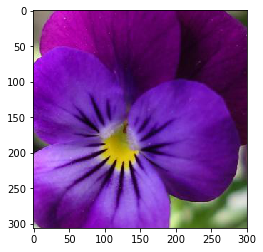

In [10]:
# Cell #10
# Cropping is simply taking a square area smaller than the original
# image. Here is a little function that can do that.
def crop_sides(image,numpix=100):
  return image[numpix:-numpix,numpix:-numpix,:]

plt.imshow(crop_sides(pansy))
plt.show()

In [11]:
# Cell #11
# Turning an RGB color image into grayscale can be achieved by taking
# the average of the three colors. 
# Bonus question: why doesn't this work:
# return (pixel[0] + pixel[1] + pixel[2])/3
def pixelAverage(pixel):
        return (pixel[0]/3 + pixel[1]/3 + pixel[2]/3)


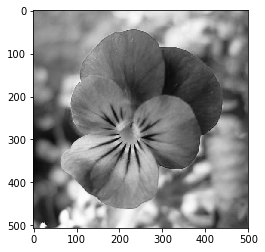

In [12]:
# Cell #12
# Let's turn an RGB image into a grayscale one

# First we make a 'black', or 'empty' image of the same size:
gray = np.zeros((pansy.shape[0],pansy.shape[1]))

# Then we go through all rows...
for rownum in range(pansy.shape[0]):
    # ... and through all columns...
    for colnum in range(pansy.shape[1]):
        # ... to calculate the grayscale value for each RGB pixel.
        gray[rownum][colnum] = pixelAverage(pansy[rownum][colnum])

# and we display the grayscale image
# Notice this weird option 'cmap'. 
plt.imshow(gray, cmap = cm.Greys_r)
plt.show()

In [13]:
# Cell #13
# In practice, turning RGB into grayscale involves weighted average.
# This to compensate for the fact that the human eye is more sensitive
# to some colors than to others.
def weightedAverage(pixel):
        return 0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2]


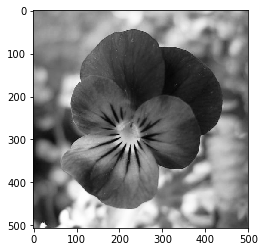

In [14]:
# Cell #14
# Let's try this again, but now using the 'weighted' averages.

# First we make a 'black', or 'empty' image of the same size:
gray = np.zeros((pansy.shape[0],pansy.shape[1]))

# Then we go through all rows...
for rownum in range(pansy.shape[0]):
    # ... and through all columns...
    for colnum in range(pansy.shape[1]):
        # ... to calculate the grayscale value for each RGB pixel.
        gray[rownum][colnum] = weightedAverage(pansy[rownum][colnum])

# and we display the grayscale image
# Notice this weird option 'cmap'. 
plt.imshow(gray, cmap = cm.Greys_r)
plt.show()

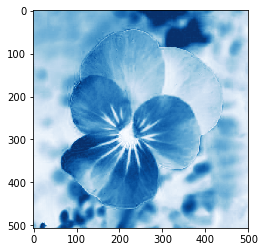

In [15]:
# Cell #15
# We can also isolate the different color channels. For instance
# to work with just the 'blue' channel, just 'slice' the numpy
# to only extract the third of the third dimension of the array.
blue = pansy[:,:,2]

# to display the blue color only, we can simply plot just 
# the one layer. However, we have to take into account the
# specific mapping of the color. Don't worry about the syntax. 
# To be honest, when it didn't look right the first time, I just
# Googled this solution....
plt.imshow(blue, cmap = cm.Blues)
plt.show()

In [16]:
# Cell #16
# Confirmation that this 'blue' layer is just 2-dimensional...
blue

array([[110, 110, 110, ...,  57,  56,  55],
       [110, 110, 110, ...,  58,  57,  56],
       [111, 111, 111, ...,  59,  58,  57],
       ..., 
       [110, 108, 109, ...,  39,  39,  39],
       [104, 105, 106, ...,  40,  41,  42],
       [104, 105, 106, ...,  40,  41,  42]], dtype=uint8)

In [17]:
# Cell #17
# The 'blue' channel is a bunch of values (500x506 of them)
# that say something about the blue color spectrum of the image
# A picture of a big red sun setting over a blue ocean will have
# many pixels with high blue values, and some with no blue values
# at all. It works like a sort of 'fingerprint' of the image
# To work with these blue values, we need to 'flatten' the matix
# into a single vector:
blue.flatten()

array([110, 110, 110, ...,  40,  41,  42], dtype=uint8)

In [18]:
# Cell #18
# For a vector of values, you can, for instance, create a histogram
# numpy has a function for that. The default number of bins for the 
# histogram function is 10. You can increase it if you like.
np.histogram(blue.flatten(),normed=True)

(array([ 0.00169464,  0.00410075,  0.0052797 ,  0.00603364,  0.00632551,
         0.00388483,  0.00386391,  0.00394931,  0.00205813,  0.00202527]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]))

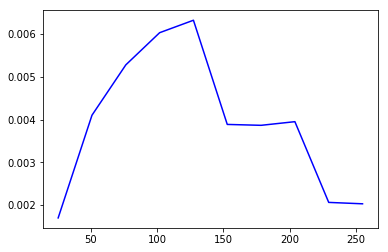

In [19]:
# Cell #19
# Let's plot the histogram. Note that what we will actually do is
# rather make an x-y plot using the histogram values
# matplotlib.pyplot also has a function to plot histograms directly, but 
# with a small number of bins the x-y plot actually looks a bit better.
# And, hey, we did already calculate the histogram values anyway, so why
# not use them!
blue_hist = np.histogram(blue.flatten(),normed=True)
plt.plot(blue_hist[1][1:],blue_hist[0],color='blue')
plt.show()

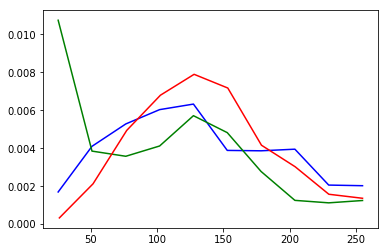

In [20]:
# Cell #20
# Obviously we can isolate all three color channels:
blue = pansy[:,:,2]
green = pansy[:,:,1]
red = pansy[:,:,0]

# ... and make histograms for each color
blue_hist = np.histogram(blue.flatten(),normed=True)
green_hist = np.histogram(green.flatten(),normed=True)
red_hist = np.histogram(red.flatten(),normed=True)

# Ok, now pay attention. It seems like we are creating THREE
# different plots. But no, we are, each time, working from the 
# SAME object! Which is the 'plt' object. We're just adding stuf
# to it.
# One additional point: the histogram data consists of TWO vectors.
# The first is of length 10, and contains the actual values.
# The second is of length 11, and contains the boundaries of the bins.
# Hence the weird slicing....
plt.plot(blue_hist[1][1:],blue_hist[0],color='blue')
plt.plot(green_hist[1][1:],green_hist[0],color='green')
plt.plot(red_hist[1][1:],red_hist[0],color='red')

# and, as usual, explicitly direct to screen.
plt.show()

In [21]:
# Cell #21
# A tiny little subroutine to calculate Euclidean distance
# between two vectors. Beware: it takes two 1-dimensional 
# numpy arrays (vectors) OF SAME LENGTH as input

def euclid_dist(vect1,vect2):
  return np.sqrt(np.sum(np.square(vect1-vect2)))


In [22]:
# Cell #22
# This subroutine first makes histograms of each color separately,
# then stacks them (horizontally) to form a single, 30-element long, 
# vector. 
# We call this a 'feature vector': secondary statistics derived of a 
# primary dataset, which can contain DIFFERENT secondary statistics as
# well, can be concatenated to a single vector that can be compared between
# many different datasets, e.g. images, but also genotype data, novels, etc.

def hist_all_colors(image):
  blue_hist = np.histogram(image[:,:,2].flatten(),normed = True)
  green_hist = np.histogram(image[:,:,1].flatten(),normed = True)
  redh_hist = np.histogram(image[:,:,0].flatten(),normed = True)
  all_hist = np.hstack((red_hist[0],green_hist[0],blue_hist[0]))
  return all_hist



In [23]:
# Cell 23
# This subroutine calculates the Euclidean distance between
# two images, based on their RGB color spectra.
# It is wrapping two other subroutines to return a single float
# which is the distance

def euclid_dist_between_images(img1,img2):
  hist1 = hist_all_colors(img1)
  hist2 = hist_all_colors(img2)
  return euclid_dist(hist1,hist2)


In [24]:
# Cell #24
# Alternative method of calculating Euclidean distances
# between images. I like the other one better; the 
# distances are calculated explicitly. Could be a bit less
# efficient, but for this example that doesn't matter.

from scipy.spatial import distance

def euclid_dist_between_images_alt(img1,img2):
  hist1 = histall(img1)
  hist2 = histall(img2)
  return distance.euclidean(hist1,hist2)


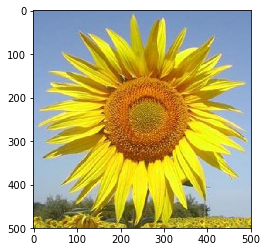

In [25]:
# Cell #25
# It takes two to have something to compare. Let's read in another flower
sunflower = misc.imread("Flowers/image_sunflower_0076.png",mode='RGB')
plt.imshow(sunflower)
plt.show()

In [26]:
# Cell #26
# With the subroutines defined, it now becomes easy-peasy
# to calculate distances between images based on color spectra
euclid_dist_between_images(sunflower,pansy)

0.021511105975651701

In [27]:
# Cell #27
# we can now easily make comparisons between multiple images
# let's read in another pansy and another sunflower, and see
# how similar they are in their color spectra. What is your 
# hypothesis on the result of the distances between these two
# pansies and two sunflowers?

sunflower2 = misc.imread("Flowers/image_sunflower_0067.png",mode='RGB')
pansy2 = misc.imread("Flowers/image_pansy_0197.png",mode='RGB')
print('dist between sunflower and pansy: {:.3f}'.format(euclid_dist_between_images(sunflower,pansy)))
print('dist between sunflower and pansy #2: {:.3f}'.format(euclid_dist_between_images(sunflower,pansy2)))
print('dist between sunflower #2 and pansy: {:.3f}'.format(euclid_dist_between_images(sunflower2,pansy)))
print('dist between sunflower #2 and pansy #2: {:.3f}'.format(euclid_dist_between_images(sunflower2,pansy2)))
print('dist between pansy and pansy #2: {:.3f}'.format(euclid_dist_between_images(pansy,pansy2)))
print('dist between sunflower and sunflower #2: {:.3f}'.format(euclid_dist_between_images(sunflower,sunflower2)))


dist between sunflower and pansy: 0.022
dist between sunflower and pansy #2: 0.026
dist between sunflower #2 and pansy: 0.026
dist between sunflower #2 and pansy #2: 0.031
dist between pansy and pansy #2: 0.015
dist between sunflower and sunflower #2: 0.015


In [28]:
# Cell #27
# As you may have noticed, there is some background in the images of
# the flowers. For instance, in one of the sunflowers there's quite a
# bit of blue sky! What do you think, could we make a more robust clustering
# of pansies and sunflowers if we would crop the images so that we 'center' a
# bit more on the flower itself?
# We DO have this 'crop_sides' function we used before, that gets rid of (default)
# 100 pixels on all sides.

sunflower2 = misc.imread("Flowers/image_sunflower_0067.png",mode='RGB')
pansy2 = misc.imread("Flowers/image_pansy_0197.png",mode='RGB')

print('dist between sunflower and pansy: {:.3f}'.format(euclid_dist_between_images(crop_sides(sunflower),crop_sides(pansy))))
print('dist between sunflower and pansy #2: {:.3f}'.format(euclid_dist_between_images(crop_sides(sunflower),crop_sides(pansy2))))
print('dist between sunflower #2 and pansy: {:.3f}'.format(euclid_dist_between_images(crop_sides(sunflower2),crop_sides(pansy))))
print('dist between sunflower #2 and pansy #2: {:.3f}'.format(euclid_dist_between_images(crop_sides(sunflower2),crop_sides(pansy2))))
print('dist between pansy and pansy #2: {:.3f}'.format(euclid_dist_between_images(crop_sides(pansy),crop_sides(pansy2))))
print('dist between sunflower and sunflower #2: {:.3f}'.format(euclid_dist_between_images(crop_sides(sunflower),crop_sides(sunflower2))))

dist between sunflower and pansy: 0.039
dist between sunflower and pansy #2: 0.036
dist between sunflower #2 and pansy: 0.045
dist between sunflower #2 and pansy #2: 0.041
dist between pansy and pansy #2: 0.008
dist between sunflower and sunflower #2: 0.022
